In [63]:
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
G = nx.MultiGraph()


In [65]:
G.add_edge(1, 2, weight=10)
G.add_edge(1,4, weight=12)
G.add_edge(4,3, weight=13)
G.add_edge(3, 2, weight=33)
G.add_edge(4, 5, weight=5)
G.add_edge(5, 3, weight=22)
G.add_edge(2, 6, weight=44)
G.add_edge(6, 3, weight=57)
G.add_edge(6, 7, weight=42)
G.add_edge(5, 7, weight=88)
G.add_edge(6, 8, weight=69)
G.add_edge(8, 9, weight=18)
G.add_edge(9, 5, weight=95)
G.add_edge(7, 8, weight=7)

0

In [60]:
a = G.edges(data='weight')
a

MultiEdgeDataView([(1, 2, 10), (1, 4, 12), (2, 3, 33), (2, 6, 44), (4, 3, 13), (4, 5, 5), (3, 5, 22), (3, 6, 57), (5, 7, 88), (5, 9, 95), (6, 7, 42), (6, 8, 69), (7, 8, 7), (8, 9, 18)])

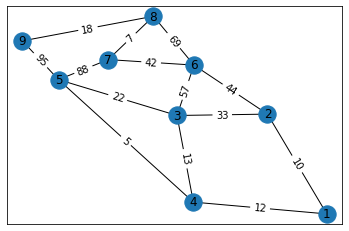

In [61]:
def print_GRF(G):
    lol = nx.Graph(G)

    pos = nx.spring_layout(G)

    nx.draw_networkx(G, pos)
    labels = nx.get_edge_attributes(lol,'weight')
    a = nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
print_GRF(G)

In [62]:
nodesDegOdd = []
for node, degree in G.degree():
    if degree % 2 == 1:
        nodesDegOdd.append(node)

In [9]:
nodesDegOdd

[2, 4, 7, 8]

In [10]:
shortPathList = []
for i in range(len(nodesDegOdd)):
    u = nodesDegOdd[i]
    for v in nodesDegOdd[i + 1:]:
        elm = (nx.shortest_path(G, u, v, weight='weight'), -nx.shortest_path_length(G,u,v,weight='weight'))
        shortPathList.append(elm)

In [11]:
shortPathList

[([2, 1, 4], -22),
 ([2, 6, 7], -86),
 ([2, 6, 7, 8], -93),
 ([4, 5, 7], -93),
 ([4, 5, 7, 8], -100),
 ([7, 8], -7)]

In [19]:
nG = nx.Graph()

edgeToPath = {}

for path in shortPathList:
    edge = (path[0][0], path[0][-1])
    otherEdge = (path[0][-1], path[0][0])
    edgeToPath[edge] = path[0]
    edgeToPath[otherEdge] = path[0]
    nG.add_edge(edge[0], edge[1], weight=path[1])

In [20]:
edgeToPath

{(2, 4): [2, 1, 4],
 (4, 2): [2, 1, 4],
 (2, 7): [2, 6, 7],
 (7, 2): [2, 6, 7],
 (2, 8): [2, 6, 7, 8],
 (8, 2): [2, 6, 7, 8],
 (4, 7): [4, 5, 7],
 (7, 4): [4, 5, 7],
 (4, 8): [4, 5, 7, 8],
 (8, 4): [4, 5, 7, 8],
 (7, 8): [7, 8],
 (8, 7): [7, 8]}

In [14]:
nG.edges(data='weight')

EdgeDataView([(2, 4, -22), (2, 7, -86), (2, 8, -93), (4, 7, -93), (4, 8, -100), (7, 8, -7)])

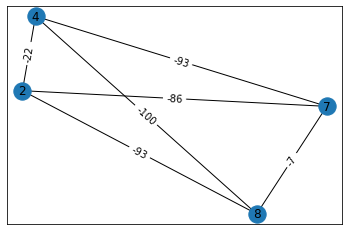

In [15]:
pos = nx.spring_layout(nG)

nx.draw_networkx(nG, pos)
labels = nx.get_edge_attributes(nG,'weight')
a = nx.draw_networkx_edge_labels(nG,pos,edge_labels=labels)

In [16]:
matching = nx.max_weight_matching(nG, True, weight='weight')
print(matching)

{(8, 7), (2, 4)}


In [17]:
G.edges()

MultiEdgeDataView([(1, 2), (1, 4), (2, 3), (2, 6), (4, 3), (4, 5), (3, 5), (3, 6), (5, 7), (5, 9), (6, 7), (6, 8), (7, 8), (8, 9)])

In [21]:
for edge in matching:
    path = edgeToPath[edge]
    for i in range(len(path) - 1):
        src = path[i]
        dst = path[i + 1]
        weight = G.edges[src, dst, 0]['weight']
        G.add_edge(src, dst, weight)

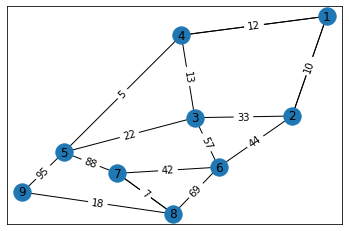

In [23]:
G.edges()
print_GRF(G)

In [27]:
for node, degree in G.degree():
    print(degree)

4
4
4
4
4
4
4
4
2


In [49]:
len(G.edges())

17

In [51]:
hehe = nx.eulerian_path(G)

IndexError: list index out of range

In [54]:
# Undirected = MultiGraph
def solveNx(g):
    # Store nodes having incidence degree that is odd
    nodesDegOdd = []
    for node, degree in g.degree():
        if degree % 2 == 1:
            nodesDegOdd.append(node)
    
    # Find shortest path between each nodes
    
    shortPathList = []
    
    for i in range(len(nodesDegOdd)):
        u = nodesDegOdd[i]
        for v in nodesDegOdd[i:]:
            elm = (nx.shortest_path(G, u, v, weight='weight'), -nx.shortest_path_length(G,u,v,weight='weight'))
            shortPathList.append(elm)
            
    
    # Make a graph of the odd nodes that links the nodes  by their shortest path
    #   each edge will have the shortest path as weight
    
    nG = nx.Graph()

    edgeToPath = {}

    for path in shortPathList:
        edge = (path[0][0], path[0][-1])
        otherEdge = (path[0][-1], path[0][0])
        edgeToPath[edge] = path[0]
        edgeToPath[otherEdge] = path[0]
        nG.add_edge(edge[0], edge[1], weight=path[1])
    
    # Do the MINIMAL matching weighted matching
    
    matching = nx.max_weight_matching(nG, True, weight='weight')
    
    # We have all the edges that represent the minimum paths
    
    for edge in matching:
        path = edgeToPath[edge]
        for i in range(len(path) - 1):
            src = path[i]
            dst = path[i + 1]
            weight = G.edges[src, dst, 0]['weight']
            G.add_edge(src, dst, weight)
    
    # Find all paths using edges to add to the original graph for it to be an eulerian cycle
    
    it = nx.eulerian_path(G)
    edgeList = []
    for edge in it:
        edgeList.append(edge)
    return edgeList

In [67]:
def solve(is_oriented, num_vertices, edge_list):
    g = nx.MultiGraph()
    twoEdgeList = []
    
    for edge in edge_list:
        g.add_edge(edge[0], edge[1], weight=edge[2])
        twoEdgeList.append(edge[0], edge[1])
        
    path = solveNx(g)    
    
    for i in range(len(path)):
        path[i] = twoEdgeList.index(path[i])
        
    return path

In [66]:
solveNx(G)

[(1, 4),
 (4, 5),
 (5, 9),
 (9, 8),
 (8, 7),
 (7, 8),
 (8, 6),
 (6, 7),
 (7, 5),
 (5, 3),
 (3, 6),
 (6, 2),
 (2, 3),
 (3, 4),
 (4, 1),
 (1, 2),
 (2, 1)]